<a href="https://colab.research.google.com/github/dgilrua/Trabajo-1-RNA/blob/parte_1/Optimizaci%C3%B3n_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Funcion Rosenbrock

La función *Rosenbrock* se define como:

$f(x_1,x_2) = (a - x_1)² + b(x_2 - x_1²)²$

In [61]:
def rosenbrock_f(x1,x2, a = 1.0, b = 100.0):
  f = (a-x1)**2 + b*(x2-x1**2)**2
  return f

In [62]:
n_points = 50

X = np.linspace(-2,2,n_points)
Y = np.linspace(-1,3,n_points)

X, Y = np.meshgrid(X,Y)

Z = rosenbrock_f(X,Y)

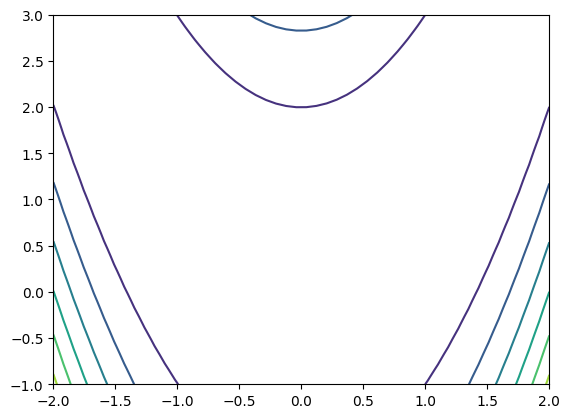

In [63]:
fig , ax = plt.subplots()
ax.contour(X,Y,Z)
plt.show()

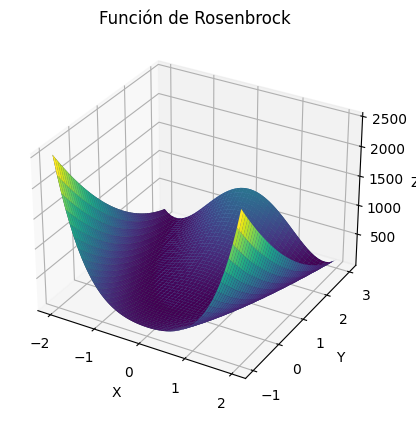

In [64]:
fig , ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.plot_surface(X,Y,Z)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Función de Rosenbrock')
plt.show()

#Funcion Rastrigin

La función *Rastrigin* se define para __n__ dimensiones como:

$$
f(X) = An + \sum_{i=1}^n{x_i²- A\cos(2πx_i)}
$$


Para el caso de 2D

$$
f(x_1,x_2) = 2A + {x_1²- A\cos(2πx_1)} + {x_2²- A\cos(2πx_2)}
$$



In [65]:
def rastrigin(x, y, A=10):
  return 2 * A + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

In [66]:
X = np.linspace(-4,4,n_points)
Y = np.linspace(-4,4,n_points)
X, Y = np.meshgrid(X,Y)

Z = rastrigin(X, Y)

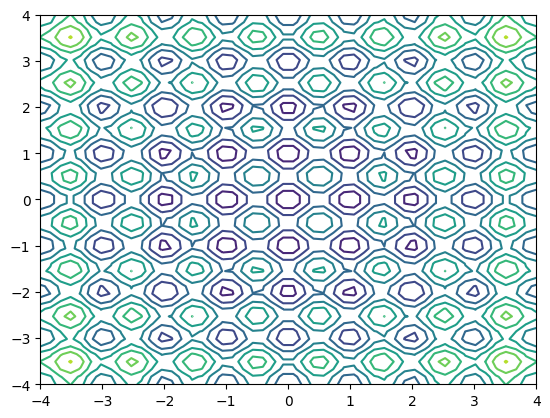

In [67]:
fig , ax = plt.subplots()
ax.contour(X,Y,Z)
plt.show()

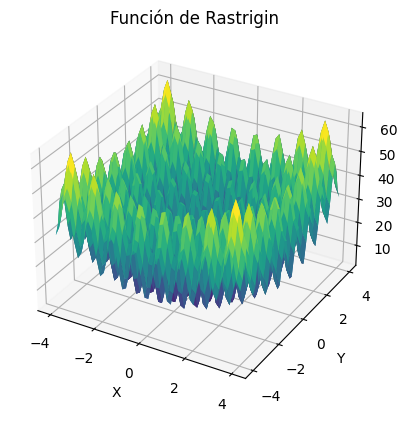

In [68]:
fig , ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.plot_surface(X,Y,Z)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Función de Rastrigin')
plt.show()

# Optimizador nDimensions

In [210]:
def rosenbrock_f(x1,x2, a = 1.0, b = 100.0):
  f = (a-x1)**2 + b*(x2-x1**2)**2
  return f

In [211]:
rosenbrock_f(0,0)

1.0

In [212]:
def rosenbrock_grad(x1,x2,a=1,b=100):
      return ([
        2 * (x1 - a) - 4 * b * x1 * (x2 - x1**2),
        2 * b * (x2 - x1**2)
    ])

In [213]:
def mi_f_grad(x1,x2):
  f = rosenbrock_grad(x1,x2)

In [214]:
rosenbrock_grad(0,0)

[-2, 0]

In [216]:
def mi_optim_nd(x1,x2,g,g1p,lr = 0.01,maxiter = 100,tol=1E-2):
    solucion = []
    valor_obj= []
    k = 0
    solucion.append([x1,x2])
    valor_obj.append(g(x1,x2))
    dif_sol=1

    while (k < maxiter and dif_sol > tol):
      x_new = [solucion[k][0] - lr * g1p(solucion[k][0],solucion[k][1])[0],
               solucion[k][1] - lr * g1p(solucion[k][0],solucion[k][1])[1]]

      solucion.append(x_new)
      valor_obj.append(g(x_new[0], x_new[1]))
      k += 1
      dif_sol = np.abs(valor_obj[k] - valor_obj[k-1])
    return (solucion,valor_obj,k)


sol_2d_congrad,valor_Obj_2d_congrad,k_2d_congrad = mi_optim_nd(x1=0,x2=0, g = rosenbrock_f, g1p = rosenbrock_grad)


In [217]:
#sol_2d_congrad

In [218]:
n_points = 50

X = np.linspace(-2,2,n_points)
Y = np.linspace(-1,3,n_points)

X, Y = np.meshgrid(X,Y)

Z = rosenbrock_f(X,Y)

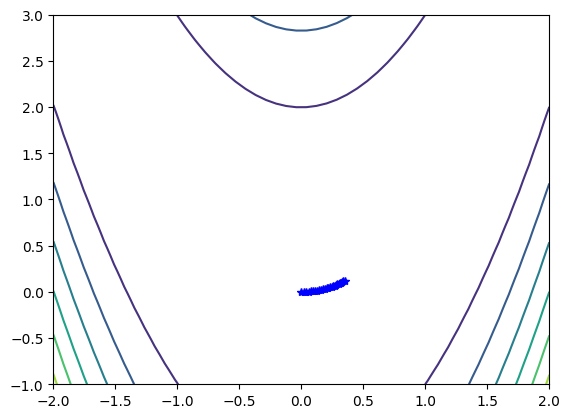

In [219]:
sol_2d_congrad,valor_Obj_2d_congrad,k_2d_congrad = mi_optim_nd(x1=0,x2=0, g = rosenbrock_f, g1p = rosenbrock_grad,lr = 0.01)


fig , ax = plt.subplots()
ax.contour(X,Y,Z)

for i in range(k_2d_congrad):
  plt.plot(sol_2d_congrad[i][0],sol_2d_congrad[i][1], '*b')
plt.show()

verificamos que salgan datos similares